Let us import all the necessory packages required.

In [113]:
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

Importing the dataset

In [114]:
from sklearn.datasets import load_iris

dataset = load_iris()
X = dataset.data
Y = dataset.target

In [115]:
# Creating a dataframe
X = pd.DataFrame(X, columns=dataset.feature_names)
Y = pd.DataFrame(Y, columns=['target'])

### **Train Test Split**

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=687)

### **Data Visualization**

In [117]:
X_train.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.136565,0.888092,0.839342
sepal width (cm),-0.136565,1.000000,-0.430541,-0.381512
petal length (cm),0.888092,-0.430541,1.000000,0.964153
petal width (cm),0.839342,-0.381512,0.964153,1.000000


We will now visualize this correlation

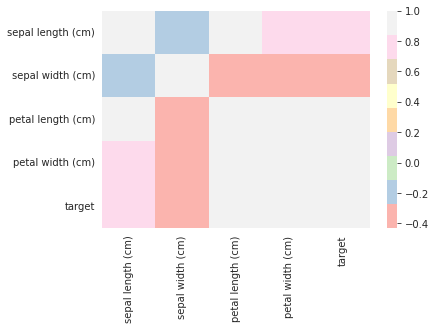

In [118]:
sns.heatmap(data=pd.concat([X_train, Y_train], axis=1).corr(), cmap="Pastel1")

In [119]:
sample_df = pd.concat([X_train, Y_train], axis=1)
map_dict = {0: 'setosa', 1: 'versicolour', 2: 'virginica'}
sample_df['target'] = sample_df['target'].map(map_dict)

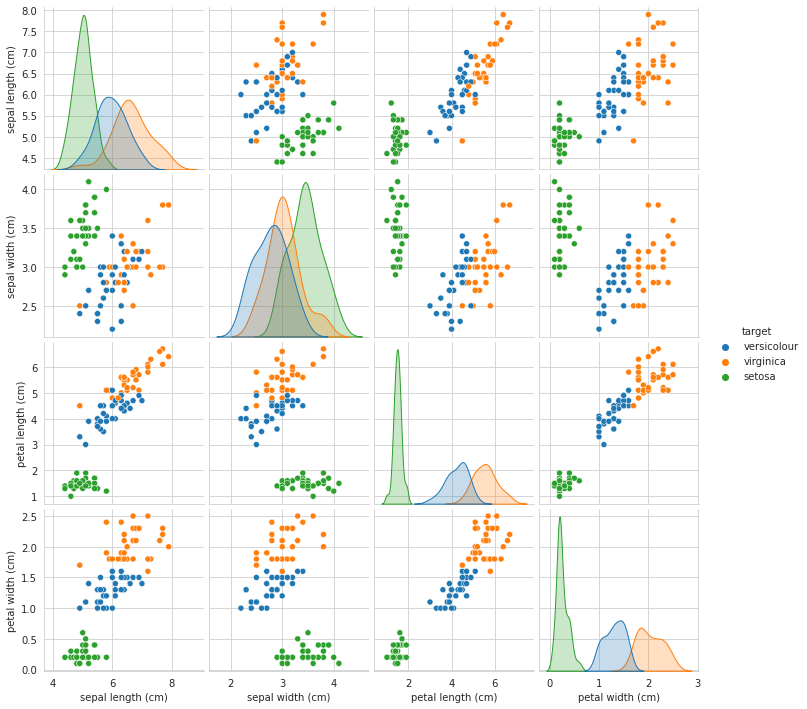

In [120]:
sns.pairplot(sample_df, hue='target')

It is evident that all these data points are highly related to the target column and hence machine learning model would be accuarate.

The challenge here would be saperate versicolour and virginica as the other one is really separated from each other.

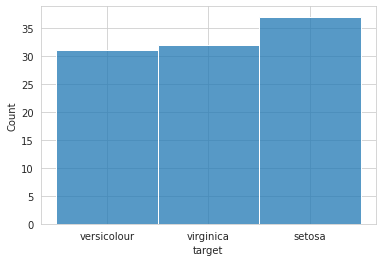

In [121]:
sns.histplot(sample_df['target'])

Almost equal counts. Hence no outliers and no less sample space. Lets go into modelling now.

### **Modeling**

#### **Logistic Regression**

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [128]:
# Creating the model
lreg = LogisticRegression()

# Training the model
lreg.fit(X_train, Y_train['target'])

# Using the trained model for prediction
lreg_pred = lreg.predict(X_test)

# Checking the accuracy
print(accuracy_score(lreg_pred, Y_test))

0.92


**WE GOT IT 92% ACCURATE.**

#### **K Neighbor Classification**

In [129]:
from sklearn.neighbors import KNeighborsClassifier

We need to check the best value for k.

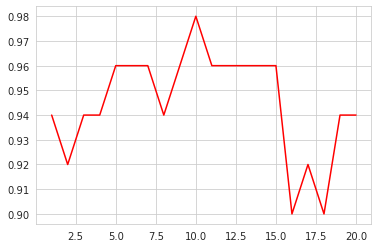

In [167]:
# Finding accuracy for various k values
accuracy = []
for k in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, Y_train['target'])
  accuracy.append(accuracy_score(knn.predict(X_test), Y_test['target']))

# Plotting the accuracy values
plt.plot(list(range(1, 21)), accuracy, color='red')
plt.show()

Maximum accuracy was for k = 10

There is also a consideration that k value that is the squareroot of the number of samples will be the best k value, which is 10/

In [166]:
# Creating the model
knn = KNeighborsClassifier(n_neighbors=10)

# Training the model
knn.fit(X_train, Y_train['target'])

# Using the trained model for prediction
knn_pred = knn.predict(X_test)

# Checking the accuracy
print(accuracy_score(knn_pred, Y_test))

0.98


**WE GOT IT 98% ACCURATE.**

#### **Support Vector Machines**

In [169]:
from sklearn.svm import SVC

In [170]:
# Creating the model
svm = SVC()

# Training the model
svm.fit(X_train, Y_train['target'])

# Using the trained model for prediction
svm_pred = svm.predict(X_test)

# Checking the accuracy
print(accuracy_score(svm_pred, Y_test))

0.96


**WE GOT IT 96% ACCURATE.**